In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('/content/iris.csv')

In [20]:
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [22]:
#now numerical cols we have to seperate
x = df[["Sepal.Length", "Sepal.Width", "Petal.Length","Petal.Width"]]


In [23]:
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
#descriptive analysis
results = {}
for col in x:
    results[col] = {
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Mode': df[col].mode(),
        'Std Dev': df[col].std()
    }

In [29]:
#  summary table
summary_df = pd.DataFrame(results).T
print(summary_df)

                  Mean Median  \
Sepal.Length  5.843333    5.8   
Sepal.Width   3.057333    3.0   
Petal.Length     3.758   4.35   
Petal.Width   1.199333    1.3   

                                                           Mode   Std Dev  
Sepal.Length        0    5.0
Name: Sepal.Length, dtype: float64  0.828066  
Sepal.Width          0    3.0
Name: Sepal.Width, dtype: float64  0.435866  
Petal.Length  0    1.4
1    1.5
Name: Petal.Length, dtype: f...  1.765298  
Petal.Width          0    0.2
Name: Petal.Width, dtype: float64  0.762238  


In [40]:
# Calculate the Mean
mean_sl = df['Sepal.Length'].mean()
mean_sw = df['Sepal.Width'].mean()
mean_pl = df['Petal.Length'].mean()
mean_pw = df['Petal.Width'].mean()

In [41]:
# Calculate the Median
median_sl = df['Sepal.Length'].median()
median_sw = df['Sepal.Width'].median()
median_pl = df['Petal.Length'].median()
median_pw = df['Petal.Width'].median()

In [42]:
mode_sl = df['Sepal.Length'].mode().iloc[0]
mode_sw = df['Sepal.Width'].mode().iloc[0]
mode_pl = df['Petal.Length'].mode().iloc[0]
mode_pw = df['Petal.Width'].mode().iloc[0]

In [43]:
std_sl = df['Sepal.Length'].std()
std_sw = df['Sepal.Width'].std()
std_pl = df['Petal.Length'].std()
std_pw = df['Petal.Width'].std()

In [38]:
df.dtypes

,0
Unnamed: 0,int64
Sepal.Length,float64
Sepal.Width,float64
Petal.Length,float64
Petal.Width,float64
Species,object


In [44]:
#interpretation result
print("--- Descriptive Statistics for Iris Data ---")
print("Feature        | Mean    | Median  | Mode  | Std Dev")
print("-" * 55)
print(f"Sepal.Length   | {mean_sl:.3f} | {median_sl:.1f}  | {mode_sl:.1f}  | {std_sl:.3f}")
print(f"Sepal.Width    | {mean_sw:.3f} | {median_sw:.1f}  | {mode_sw:.1f}  | {std_sw:.3f}")
print(f"Petal.Length   | {mean_pl:.3f} | {median_pl:.2f} | {mode_pl:.1f}  | {std_pl:.3f}")
print(f"Petal.Width    | {mean_pw:.3f} | {median_pw:.1f}  | {mode_pw:.1f}  | {std_pw:.3f}")

--- Descriptive Statistics for Iris Data ---
Feature        | Mean    | Median  | Mode  | Std Dev
-------------------------------------------------------
Sepal.Length   | 5.843 | 5.8  | 5.0  | 0.828
Sepal.Width    | 3.057 | 3.0  | 3.0  | 0.436
Petal.Length   | 3.758 | 4.35 | 1.4  | 1.765
Petal.Width    | 1.199 | 1.3  | 0.2  | 0.762


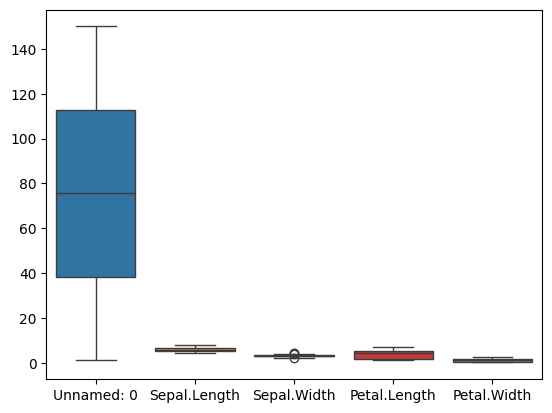

In [39]:
sns.boxplot(data=df)
plt.show()


In [45]:
#identify the outliers
column_name = 'Sepal.Width'

In [46]:
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

In [47]:
IQR = Q3 - Q1

In [48]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [49]:
outliers_df = df[ (df[column_name] < lower_bound) | (df[column_name] > upper_bound) ]

In [50]:
#outlier result
print(f"Feature Analyzed: {column_name}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"\nTotal Outliers Found: {len(outliers_df)}")
print("\nOutlier Rows (showing only Sepal.Width):")
print(outliers_df[[column_name]])

Feature Analyzed: Sepal.Width
Lower Bound: 2.05
Upper Bound: 4.05

Total Outliers Found: 4

Outlier Rows (showing only Sepal.Width):
    Sepal.Width
15          4.4
32          4.1
33          4.2
60          2.0


In [2]:
#Data visualization is crucial in statistics because it transforms raw numerical data into graphical
 #representations (like charts, graphs, and plots), making complex information accessible and understandable.

In [ ]:
#Histograms AND box plot : These display the distribution of a single numerical variable.
#They show Shape, skewed (left or right), or bimodal.Central Tendency ,Spread: The range of values.
#Outliers: Unusual values that fall far from the main body of the data.Boxplots

In [3]:
# the use of z_score is :
# used to find the data outliers
#it Standardize the data
# normal distribution :
#ormal distribution is used to model and understand phenomena with a central average value
#, like human heights or measurement errors
# by forming a bell-shaped curve that shows data clustered around the mean